### PROBLEM 6.1: PROGRAMMING K-MEAN CLUSTERS

#### IMPORT THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

#### GENERATE 3 CLUSTERS WITH CHOOSEN CENTROIDS

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

In [3]:
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

In [5]:
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

#### DISPLAY 3 CLUSTERS BY 3 COLORS: RED, BLUE, GREEN

In [7]:
# Define a function to plot all the clusters
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

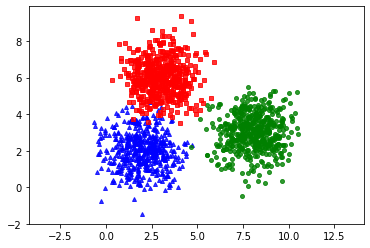

In [8]:
kmeans_display(X, original_label)

∗ Implement several functions for the K-means clustering algorithm:
    
 kmeans init centers to initiate centroids

 kmeans assign labels to assign a new label to a data point after comparing distances with
centroids

 kmeans update centers to update new centroids for clusters after having all data points assigned to labels

 has converged to verify the stop condition of the algorithm.

In [9]:
# Create all functions above:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [10]:
def kmeans_assign_labels(X, centers):
     # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [11]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
       # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [12]:
def has_converged(centers, new_centers):
      # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
        set([tuple(a) for a in new_centers]))

In [13]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centroids found by the algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


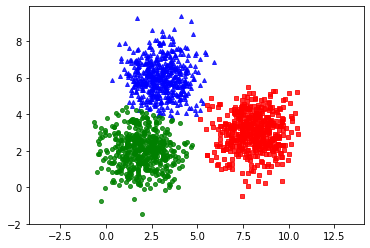

In [15]:
(centers, labels, it) = kmeans(X, K)
print('Centroids found by the algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

### PROBLEM 2: EXPLORING THE K-MEANS CLUSTERING PROGRAM

#### EXERCISE 1

 Find out the number of iterations when the algorithm stops? 

In [16]:
it

5

Show lists of data points changing clusters for each iteration?

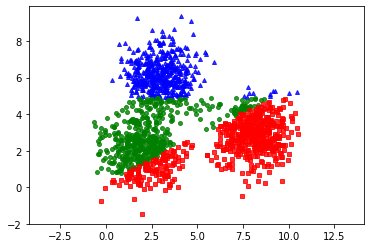

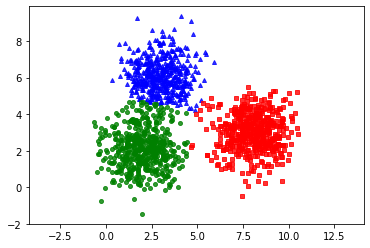

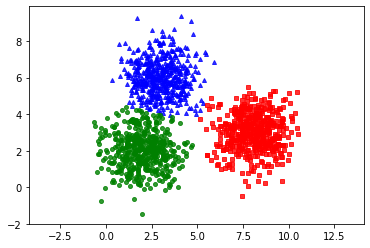

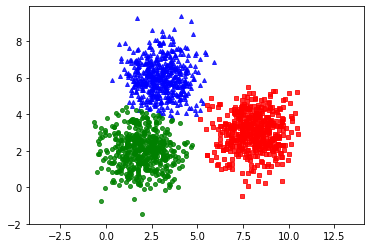

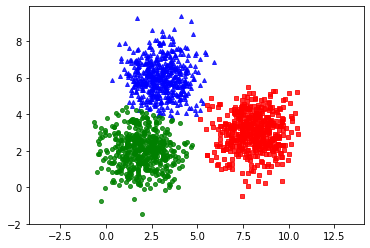

In [17]:
for i in range(5):
    kmeans_display(X, labels[i])

#### EXERCISE 2

Propose a solution if the program is not converged? 

-The initial k-centroids were picked randomly from the data points.This randomization of picking k-centroids points results in the problem of initialization sensitivity. 

-This problem tends to affect the final formed clusters. The final formed clusters depend on how initial centroids were picked.

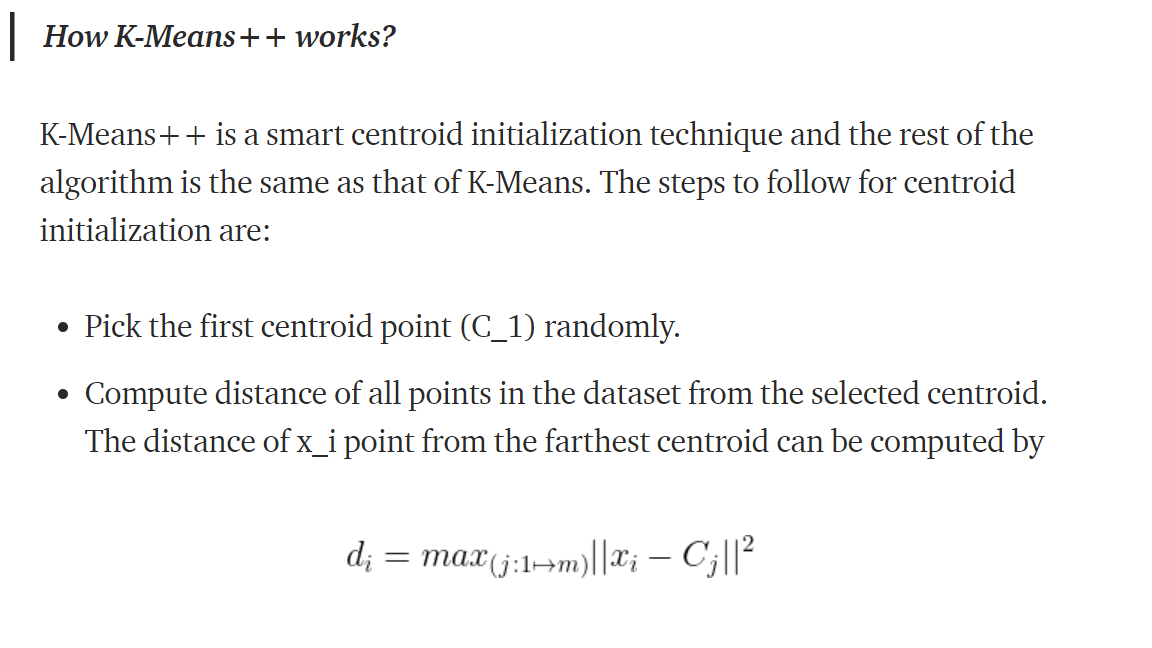

In [22]:
from IPython.display import Image
Image(filename = "C:/Users/Win 10/Pictures/k-mean.png", width = 600, height = 300)

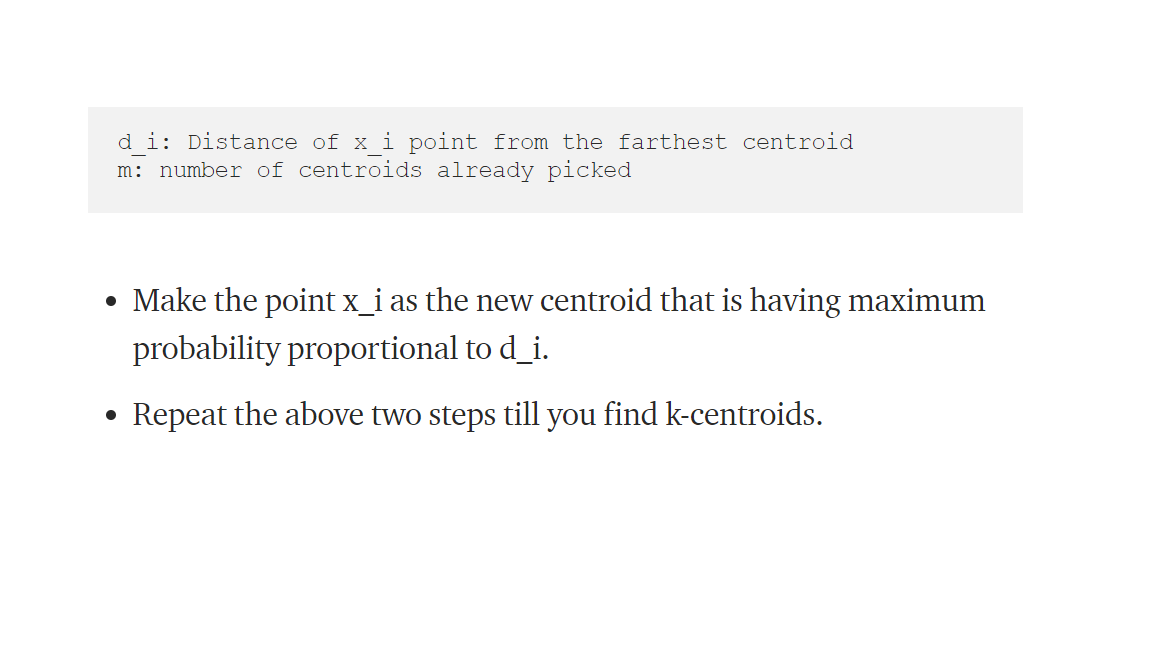

In [23]:
Image(filename = "C:/Users/Win 10/Pictures/k-mean2.png", width = 600, height = 300)

#### WE USE THE ELBOW METHOD TO IDENTIFY THE OPTIMAL NUMBER OF CLUSTERS

In [19]:
from sklearn.cluster import KMeans

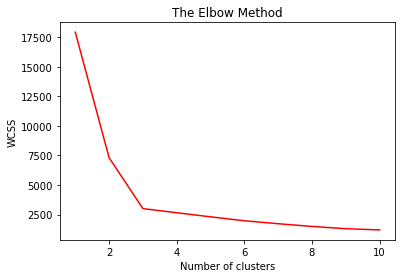

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### APPLY THE SKLEARN PACKAGE AND K-MEAN++ METHOD FOR CENTROIDS INITIALIZATIONM

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

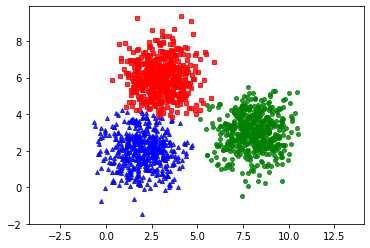

In [26]:
kmeans_display(X, y_kmeans)

#### WHAT IF THE NUMBERS OF CLUSTERS (K) IS BAD 

FOR EXAMPLE, I CHOOSE THE NUMBER OF CLUSTERS IS 2 

In [27]:
kmeans_2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_2 = kmeans_2.fit_predict(X)

##### VISUALIZATION

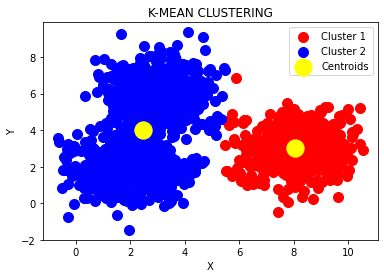

In [28]:
plt.scatter(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-MEAN CLUSTERING')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

THE RESULT IS QUITE BAD, AS ACTUALLY WE HAVE 3 CLUSTERS